# Machine Learning with Python

Have not yet decided which data sets im going to use. probably the typical example sets like Iris, Titanic etc. 
Notation will be mostly based on scikit_learn convetions and the book 'Elements of statisitical learning' by Hasties. 
Most probably I will steal some content from this guy https://github.com/donnemartin/data-science-ipython-notebooks


My draft for an outline:

    1. Start with very short primer on the mathematical formulation of the problem so everybody is familar with common notations often found in books or tutorials elsewhere. (Maybe 10 Minutes)     
    2. Some general remarks on scikit-learn and its structure. 
    3. Read and visualize an example data set (don't know which yet. Maybe Iris.)
    4. Unsuppervised Learning aka. clustering algorithms like KNN (and maybe  density based clustering like DBscan)
    5. Supervised Learning example and general formulation (loss functions and such). 
    6. Show some algorithms like naive bayes, SVMs, decission trees, neural nets..
    7. Validation. Cross validation, RoC curves etc. 
    
 

# A word on what machines can (and cannot) do

The term *Artifical Inteligence* was coined by John McArthy for the 1956 Dartmouth Conference. 

The idea of a *mechanical brain* is much older. 

![The Turk](https://upload.wikimedia.org/wikipedia/commons/8/8b/Tuerkischer_schachspieler_windisch4.jpg)   


The Church-Turing Thesis

> Every effectively calculable function is a computable function.

Using Turings definitions of computability

> "We shall use the expression 'computable function' to mean a function calculable by a machine, and let 'effectively calculable' refer to the intuitive idea without particular identification with any one of these definitions."

In other words:

> If something is intuitivly calculable (in whatever manner you can think of), it can be computed by a machine. 

> If something can be computed by a machine, it can be computed by a brain. (given enough time)

__Are computers just as good as human brains then?__

They seem to work well together.

Computer assisted proof of the Four-Color-Problem in 1989:
    
>  ...part of the proof was verified in over 400 pages of microfiche, which had to be checked by hand with the assistance of Haken's daughter...


__Well, no.__

Easy problem for machines:

* Is this text written in the english language?

Unsolvable problem for machines:

* What does this text mean?

![Alice checking for Poison](../resources/alice.jpg)

Machines are limited

* Mapping syntax and symbols to semantics and objects in the real world is something inherently human (or intelligent).

* Some problems are not computable (for either man or machine) however humans can write these problems (not the solutions) and mathematically __prove__ that they cannot be computed.

* Machines cannot "learn"

# Machine Learning



## Mathematical Notation and Problem Description

*For more details see "Elements of statistical Learning" by Trevor Hastie.* 


One definition of supervised machine learning:

> Given a $N \times p$ matrix $\mathbf{X}$ matrix and some associated output vector $\mathbf{Y} \in \mathbb{R}^N$,
 find a function $f(X) = \hat{Y}$ that takes a vector $X \in \mathbb{R}^p$ and returns a prediction for $\hat{Y}$
 where some "loss function" $L(Y, f(X))$ is minimized for all $X$.

##### The Titanic Example

Passenger list of name, gender, age and the booked class on board.  

![Much Wow](../resources/nyt_titanic.jpg)

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(context='notebook')
pd.options.display.max_rows = 10

def read_titanic():
    data = pd.read_csv('../resources/titanic_train.csv', index_col='PassengerId').dropna(subset=['Age'])
    data['Survived_Code'] = data.Survived
    data.Survived = pd.Categorical.from_codes(data.Survived, categories=['no', 'yes'])
    data.Pclass = pd.Categorical(data.Pclass)
    data.Sex = pd.Categorical(data.Sex)
    data['Sex_Code'] = data.Sex.cat.codes
    return data

In [16]:
data = read_titanic()
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_Code,Sex_Code
PassengerId,,,,,,,,,,,,,
1,no,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
2,yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
3,yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
4,yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
5,no,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,no,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,0,0
887,no,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1
888,yes,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0


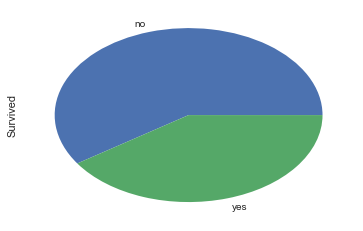

In [2]:
data.Survived.value_counts().plot.pie()

Given a new vector $X = (Name, Class, Age, Sex)$ can we find a function $f_{survival}(X) \in \{{yes, no}\}$ that accurately predicts the survival of the passengers in most cases?


Well yes. Let's presume rich people get to go into lifeboats.

```
def f_survival(passenger):
    if passenger.Class == '1st':
        return 'yes'
    else:
        return 'no'
```

But how do we know whether that predictor is any good?

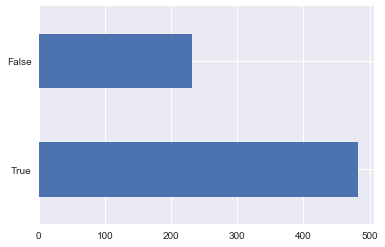

In [3]:
data['prediction'] = data.apply(lambda p: 'yes' if p['Pclass'] == 1 else 'no', axis='columns')
(data.prediction == data.Survived).value_counts().plot.barh()

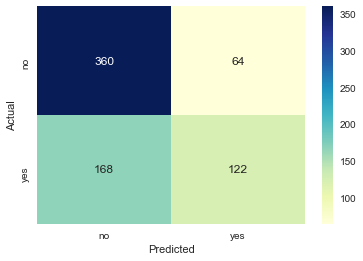

In [4]:
cm = pd.crosstab(data.Survived, data.prediction, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")

What about the women? Maybe we get a better predictor.
 
```
def f_survival(passenger):
    if passenger.Sex == 'female':
        return 'yes'
    else:
        return 'no'
```

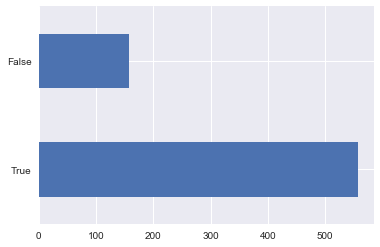

In [5]:
data['prediction'] = data.apply(lambda p: 'yes' if p['Sex'] == 'female' else 'no', axis='columns')
(data.prediction == data.Survived).value_counts().plot.barh()

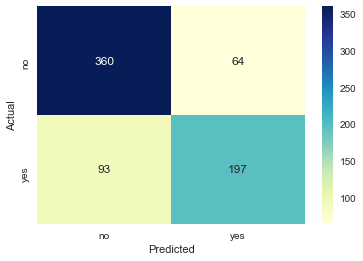

In [6]:
cm = pd.crosstab(data.Survived, data.prediction, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")

Can we improve our predictor by combining more variables into one predictor?

Lets presume a linear weighted combination of variables:

$$
f(X)= \hat{β}_0 + \sum_{j=1}^p X_j \hat{β}_j
$$

or in our case when combining sex and money:

$$
f(X)= \hat{β}_0 + X_{Class} \hat{β}_{Class} + X_{Sex} \hat{β}_{Sex}  
$$

How do you find those weights?

Choose and then optimize a loss function. In this case the popular residual sum of squares 

$$L(\beta) = RSS(\mathbf{\beta}) = \sum_{i=1}^N (Y_i - X_i^T \beta)^2 $$



Rewrite the problem in matrix form:

\begin{align}
X^T &= (1, Class, Sex) \\ 
\mathbf{\hat{\beta}}^T &= (\hat{β}_0, \hat{β}_{Class}, \hat{β}_{Sex}) \\
\mathbf{y} &= {Y_1, \ldots, Y_N} 
\end{align}

Makes the formulation more compact for the predictor

$$
\hat{\mathbf{y}} = X^T \hat{β}
$$

and the loss function

$$
RSS(\beta) = (\mathbf{y} - \mathbf{X} \beta)^T (\mathbf{y} - \mathbf{X} \beta )
$$


Optimize loss function just like any other function. Set the derivative equals to zero.

$$
{RSS}^\prime(\beta) =  \mathbf{X}^T (\mathbf{y} - \mathbf{X} \beta ) \stackrel{!}{=} 0
$$

Solving for $\beta$ leads to

$$
\hat{β} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

You just invented Linear Least Squares regression.

Now we can define a function to predict passenger survival according to

$$
\hat{Y} = \begin{cases}
\text{Yes}, & \text{if $ f(X) \gt 0.5$} \\
\text{No}, & \text{if $ f(X) \le 0.5$}
\end{cases}
$$ 

##### Excersise 1: Linear Regression and Classification (10 - 20 minutes)

Create an artificial 2D dataset with two classes and use the least squares method to seperate them.

1. Create 2D gaussians of data for classes A and B
    
        A = np.random.multivariate_normal(mean=[1, 1], cov=[[2,1], [1,2]], size=200)
        B = ....
    
2. Plot the distributions into one scatter plot
        
        plt.scatter(x_coordinates, y_coordinates, s=size_of_points)
        
3. Create the $X$ matrix and the output (label) vector $Y$
        
        X = np.vstack([A, B])
        Y = [0, 0, 0, ..., 1, 1, 1, ...]
        
4. Use scikit-learn's linear regressor to find the parameters for $f(X_1, X_2) = \hat{Y}$.

        from sklearn import linear_model
        reg = linear_model.LinearRegression()
        reg.fit(X, Y)
        b_1, b_2 = reg.coef_
        b_0 = reg.intercept_

5. Draw a dashed line into the plot where $f(X_1, X_2) = 0.5$.

        x1s = np.linspace(-8, 8)
        ...
        ...
        plt.plot(x1s, x2s, color='gray', linestyle='--')

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


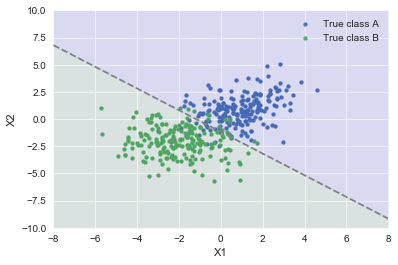

In [7]:
from sklearn import linear_model
np.random.seed(1234)
# create two gaussians
A = np.random.multivariate_normal(mean=[1, 1], cov=[[2,1], [1,2]], size=200)
B = np.random.multivariate_normal(mean=[-2, -2], cov=[[2,0], [0,2]], size=200)

#get them into proper matrix form
X = np.vstack([A, B])
Y = np.hstack([np.zeros(len(A)), np.ones(len(B))])

# train the linear regressor and save the coefficents
reg = linear_model.LinearRegression()
reg.fit(X, Y)
b_1, b_2 = reg.coef_
b_0 = reg.intercept_

# solve the function y = b_0 + b_1*X_1 + b_2 * X_2 for X2
x1s = np.linspace(-8, 8)
x2s = (0.5 - b_0 - b_1*x1s)/b_2

# plotting code
plt.scatter(A[:,0], A[:, 1], s=15, label='True class A')
plt.scatter(B[:,0], B[:, 1], s=15, label='True class B')

plt.plot(x1s, x2s, color='gray', linestyle='--')

plt.fill_between(x1s, x2s, 10, color='blue', alpha=0.07)
plt.fill_between(x1s, x2s, -10, color='green', alpha=0.07)

plt.xlabel('X1')
plt.ylabel('X2')
plt.margins(x=0, y=0)
plt.legend()

We just *learned* the parameters for a statistical model based on labeled data.


Can a linear classification improve the classification of the Titanic dataset case?

[ -4.78664588e-01  -2.00417263e-01   6.80053306e-05  -5.42560851e-03]


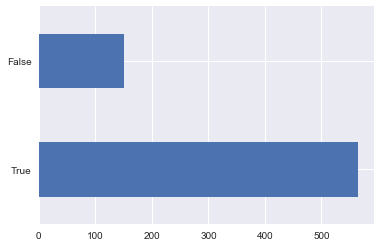

In [8]:
from sklearn import linear_model
df = data.copy()
X = df[['Sex_Code', 'Pclass', 'Fare', 'Age']]
Y = df['Survived_Code']

reg = linear_model.LinearRegression()
reg.fit(X, Y)

df['prediction'] = ['yes' if p > 0.5 else 'no' for p  in reg.predict(X) > 0.5]
(df['prediction'] == df.Survived).value_counts().plot.barh()

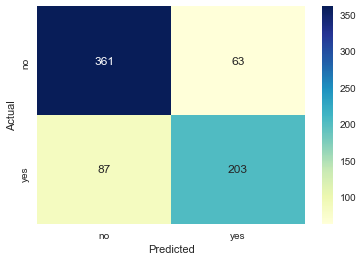

In [9]:

cm = pd.crosstab(df.Survived, df.prediction, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")

The model does not seem to improve the classification to a large degree. 

We will talk more about properly validating models later. 

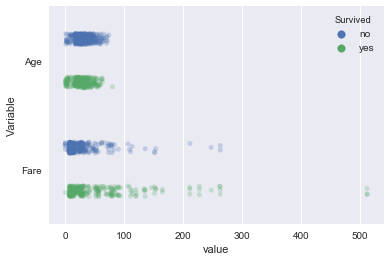

In [10]:
# df_flat = pd.melt(df[['Age', 'Fare', 'Survived']], 'Survived', var_name='Variable')
# sns.stripplot(x="value", y="Variable", hue="Survived",
#               data=df_flat, dodge=True, jitter=True,
#               alpha=.25, zorder=1)


## Non-Linear Separation Models

The basic assumption underlying the least squares approach is that the model is linear in the observed Variables. 
This works for data which can be separated by a linear function (a hyperplane in the parameter space).

But what if that isn't the case.


(-2, 6)

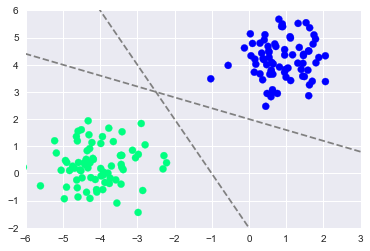

In [88]:
# many possible lines to separate the data
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=150, centers=2,
                  random_state=3, cluster_std=0.70)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')

xs = np.linspace(-6.5, 3, 2)
plt.plot(xs, -2 * xs - 2, color='gray', linestyle='--')
plt.plot(xs, -0.4 * xs + 2, color='gray', linestyle='--')
plt.xlim([-6, 3])
plt.ylim([-2, 6])

#### The Support Vector Machine

Support Vector Machines try to find the hyperplane which maximimizes the margin to the points in the parameter space.

(-2, 6)

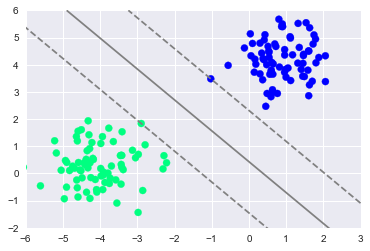

In [87]:
from sklearn.svm import SVC

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
clf = SVC(kernel='linear')
clf.fit(X, y)

x1 = np.linspace(-6.5, 3.0, 20)
x2 = np.linspace(-3.0, 6.0, 20)

X1, X2 = np.meshgrid(x1, x2)
xy = np.vstack([X1.ravel(), X2.ravel()]).T
# get the separating hyperplane
Z = clf.decision_function(xy).reshape(X1.shape)

# plot decision boundary and margins
plt.contour(X1, X2, Z, colors='gray', levels=[-1., 0, 1.0], linestyles=['--', '-', '--'])
plt.xlim([-6, 3])
plt.ylim([-2, 6])

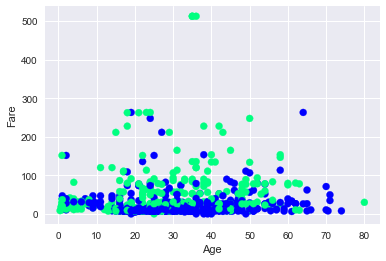

In [21]:
data = read_titanic()

plt.scatter(data.Age, data.Fare, c=data.Survived_Code, cmap='winter')
plt.xlabel('Age')
plt.ylabel('Fare')

[<matplotlib.text.Text at 0x1123ba588>, <matplotlib.text.Text at 0x1123a4b38>]

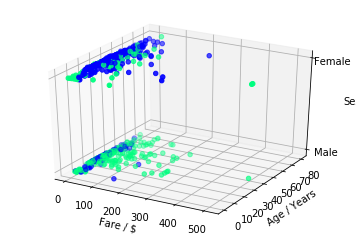

In [13]:
from mpl_toolkits.mplot3d import Axes3D
sns.reset_orig()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Fare, data.Age, df.Sex_Code, c=df.Survived_Code, cmap='winter')
ax.set_xlabel('Fare / $')
ax.set_ylabel('Age / Years')
ax.set_zlabel('Sex')
ax.set_zticks([0,1])
ax.set_zticklabels(['Male', 'Female'])

In [14]:
sns.set(context='notebook')

To improve the classification lets assume that the decission function is constant in $X$ over some local region in the parameter space:

$$
f(X) = \hat{Y} = \frac{1}{k} \sum_{x_i \in N_k(X)} y_i
$$

where $x_i \in N_k(X)$ describes the $k$ points in the training data $\mathbf{X}$ that are in the *neighbourhood* of $X$.

To put it in words. We assume $X$ will have the same $Y$ as other points nearby.